### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns",None)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, InputLayer
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

### Loading Train Dataset

In [2]:
df = pd.read_csv('/content/training.csv')

In [3]:
df.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   EventId                      250000 non-null  int64  
 1   DER_mass_MMC                 250000 non-null  float64
 2   DER_mass_transverse_met_lep  250000 non-null  float64
 3   DER_mass_vis                 250000 non-null  float64
 4   DER_pt_h                     250000 non-null  float64
 5   DER_deltaeta_jet_jet         250000 non-null  float64
 6   DER_mass_jet_jet             250000 non-null  float64
 7   DER_prodeta_jet_jet          250000 non-null  float64
 8   DER_deltar_tau_lep           250000 non-null  float64
 9   DER_pt_tot                   250000 non-null  float64
 10  DER_sum_pt                   250000 non-null  float64
 11  DER_pt_ratio_lep_tau         250000 non-null  float64
 12  DER_met_phi_centrality       250000 non-null  float64
 13 

**All data type are correct**

In [36]:
df.shape

(250000, 33)

**Rows:250,000 Columns:33**

### Unique Values and their frequency

In [37]:
for col in df.columns:
    print(f"\nColumn '{col}':")
    print("\nTotal Unique Values in ",col ,df[col].nunique())
    print("\n",df[col].value_counts())
    print("---------------------------------------------")



Column 'EventId':

Total Unique Values in  EventId 250000

 EventId
349999    1
100000    1
100001    1
100002    1
100003    1
         ..
100019    1
100020    1
100021    1
100022    1
100023    1
Name: count, Length: 250000, dtype: int64
---------------------------------------------

Column 'DER_mass_MMC':

Total Unique Values in  DER_mass_MMC 108338

 DER_mass_MMC
-999.000    38114
 113.965       10
 103.762       10
 96.415        10
 108.957       10
            ...  
 168.192        1
 112.330        1
 134.669        1
 209.201        1
 142.048        1
Name: count, Length: 108338, dtype: int64
---------------------------------------------

Column 'DER_mass_transverse_met_lep':

Total Unique Values in  DER_mass_transverse_met_lep 101637

 DER_mass_transverse_met_lep
1.800      13
3.501      12
3.183      12
2.500      12
9.362      12
           ..
98.465      1
109.304     1
28.652      1
82.809      1
48.483      1
Name: count, Length: 101637, dtype: int64
----------------

**Conclusion:**

**Categorical Columns** are 'Label' and 'PRI_jet_num'

Remaining **29** columns are **Continious Numeric**

### Missing Values

In [38]:
df.isnull().sum()

,0
EventId,0
DER_mass_MMC,0
DER_mass_transverse_met_lep,0
DER_mass_vis,0
DER_pt_h,0
DER_deltaeta_jet_jet,0
DER_mass_jet_jet,0
DER_prodeta_jet_jet,0
DER_deltar_tau_lep,0
DER_pt_tot,0


**There are no missing values**

### Duplicates

In [39]:
df.duplicated().sum()

np.int64(0)

**No duplicates were found**

In [42]:
df.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

# Mapping Target Variable

In [5]:
number_mapping = {'b': 0, 's': 1}

# Replace alpha-numeric values with their numeric counterparts
df['Label'] = df['Label'].replace(number_mapping)


/tmp/ipython-input-5-1485461515.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'] = df['Label'].replace(number_mapping)


In [6]:
df['Label'].value_counts()

,count
Label,
0,164333
1,85667


In [7]:
value_counts = df['Label'].value_counts()
value_counts_percentage = (value_counts / len(df)) * 100 # len----> no of rows
print("\n Label Column (Percentage Values):\n", value_counts_percentage)


 Label Column (Percentage Values):
 Label
0    65.7332
1    34.2668
Name: count, dtype: float64


**This is imbalanced dataset**

In [8]:
y=df['Label']

In [9]:
columns_to_drop= ['Weight', 'Label']   # removing these two columns as in test data both are removed
X= df.drop(columns=columns_to_drop,axis=1)
X.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,DER_sum_pt,DER_pt_ratio_lep_tau,DER_met_phi_centrality,DER_lep_eta_centrality,PRI_tau_pt,PRI_tau_eta,PRI_tau_phi,PRI_lep_pt,PRI_lep_eta,PRI_lep_phi,PRI_met,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,197.760,1.582,1.396,0.2,32.638,1.017,0.381,51.626,2.273,-2.414,16.824,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,125.157,0.879,1.414,-999.0,42.014,2.039,-3.011,36.918,0.501,0.103,44.704,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,197.814,3.776,1.414,-999.0,32.154,-0.705,-2.093,121.409,-0.953,1.052,54.283,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,75.968,2.354,-1.285,-999.0,22.647,-1.655,0.010,53.321,-0.522,-3.100,31.082,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,57.983,1.056,-1.385,-999.0,28.209,-2.197,-2.231,29.774,0.798,1.569,2.723,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


In [10]:
X.shape

(250000, 31)

In [11]:
# Scale inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
# Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, train_size=0.85,stratify=y,random_state=700)

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212500, 31), (37500, 31), (212500,), (37500,))

### Model-1 No Hidden Layer

In [22]:
from tensorflow.keras.optimizers import Adam

model_1 = Sequential([
    InputLayer(shape=(31,)),
    Dense(1, activation='sigmoid')
])

model_1.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model_1.summary()

# Train model
history_model_1 = model_1.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=30,
    verbose=1
)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_1 (Dense)                 │ (None, 1)              │            32 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 32 (128.00 B)

 Trainable params: 32 (128.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7364 - loss: 0.5162 - val_accuracy: 0.7467 - val_loss: 0.5077
Epoch 2/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7478 - loss: 0.5035 - val_accuracy: 0.7359 - val_loss: 0.5120
Epoch 3/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.7470 - loss: 0.5033 - val_accuracy: 0.7477 - val_loss: 0.5074
Epoch 4/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7489 - loss: 0.5005 - val_accuracy: 0.7459 - val_loss: 0.5043
Epoch 5/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.7468 - loss: 0.5043 - val_accuracy: 0.7424 - val_loss: 0.5075
Epoch 6/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.7466 - loss: 0.5035 - val_accuracy: 0.7458 - val_loss: 0.5095
Epoch 7/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.7476 - loss: 0.5023 - val_accuracy: 0.7437 - val_loss: 0.5063
Epoch 8/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.7475 - loss: 0

In [23]:
train_loss, train_accuracy = model_1.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_1.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.744
✅ Test Accuracy: 0.748

✅ Train Loss: 0.5051
✅ Test Loss: 0.5032


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Linear Model Accuracy: 0.74792


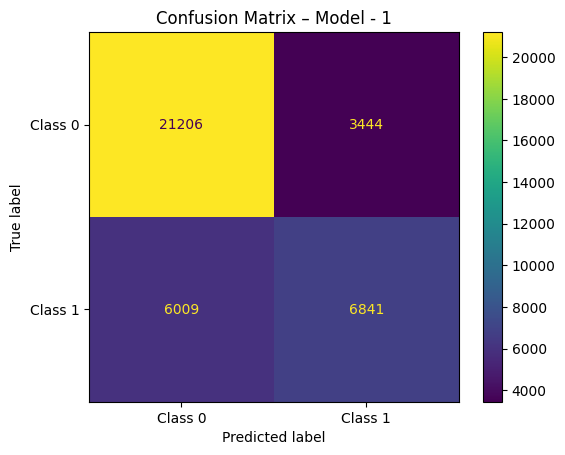

In [24]:
# Predict
y_pred_model_1 = (model_1.predict(X_test) > 0.5).astype("int32")
print("Linear Model Accuracy:", accuracy_score(y_test, y_pred_model_1))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_model_1), display_labels=["Class 0", "Class 1"]).plot()
plt.title("Confusion Matrix – Model - 1")
plt.show()

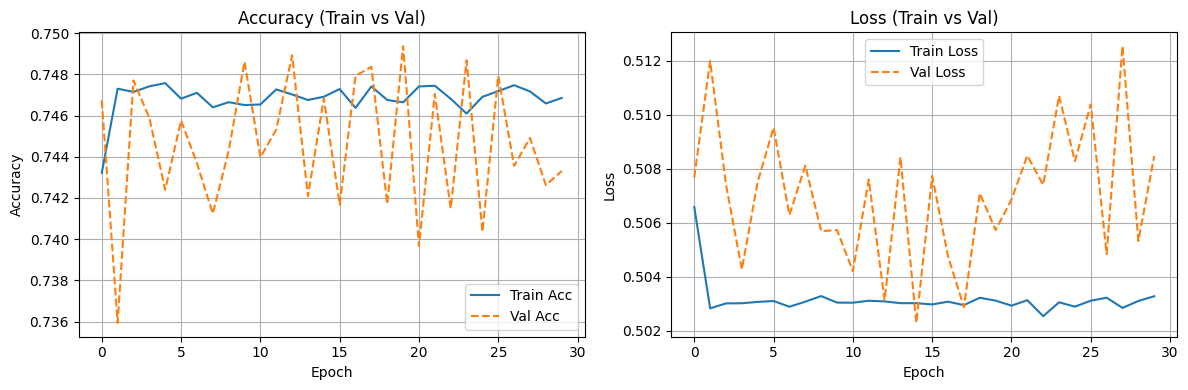

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_model_1.history['accuracy'], label='Train Acc')
axs[0].plot(history_model_1.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_model_1.history['loss'], label='Train Loss')
axs[1].plot(history_model_1.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model-2

In [33]:
model_2 = Sequential([
    InputLayer(shape=(31,)),
    Dense(16, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

#    Dense(64, activation='relu'),
#    Dense(128, activation='relu'),
#    Dense(64, activation='relu'),
model_2.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

model_2.summary()

# Train model
history_model_2 = model_2.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=30,
    verbose=1
)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,601 (6.25 KB)

 Trainable params: 1,601 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.7999 - loss: 0.4313 - val_accuracy: 0.8154 - val_loss: 0.4133
Epoch 2/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8208 - loss: 0.3956 - val_accuracy: 0.8199 - val_loss: 0.4043
Epoch 3/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8252 - loss: 0.3875 - val_accuracy: 0.8243 - val_loss: 0.3843
Epoch 4/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8257 - loss: 0.3871 - val_accuracy: 0.8252 - val_loss: 0.3816
Epoch 5/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8292 - loss: 0.3830 - val_accuracy: 0.8237 - val_loss: 0.3868
Epoch 6/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8295 - loss: 0.3812 - val_accuracy: 0.8250 - val_loss: 0.3836
Epoch 7/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8302 - loss: 0.3794 - val_accuracy: 0.8187 - val_loss: 0.4063
Epoch 8/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 34s 6ms/step - accuracy: 0.8307 - loss: 0

In [34]:
train_loss, train_accuracy = model_2.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_2.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.833
✅ Test Accuracy: 0.831

✅ Train Loss: 0.3760
✅ Test Loss: 0.3780


1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Linear Model Accuracy: 0.8310133333333334


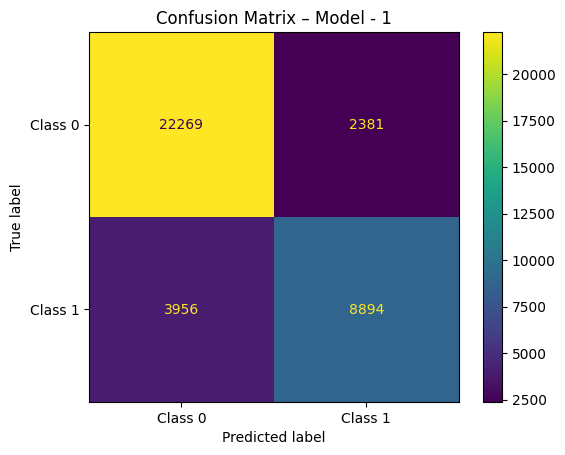

In [35]:
# Predict
y_pred_model_2 = (model_2.predict(X_test) > 0.5).astype("int32")
print("Linear Model Accuracy:", accuracy_score(y_test, y_pred_model_2))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_model_2), display_labels=["Class 0", "Class 1"]).plot()
plt.title("Confusion Matrix – Model - 1")
plt.show()

In [37]:
from sklearn.metrics import classification_report

print(" Test Classification Report")
print(classification_report(y_test, y_pred_model_2, digits=2))

 Test Classification Report
              precision    recall  f1-score   support

           0       0.85      0.90      0.88     24650
           1       0.79      0.69      0.74     12850

    accuracy                           0.83     37500
   macro avg       0.82      0.80      0.81     37500
weighted avg       0.83      0.83      0.83     37500



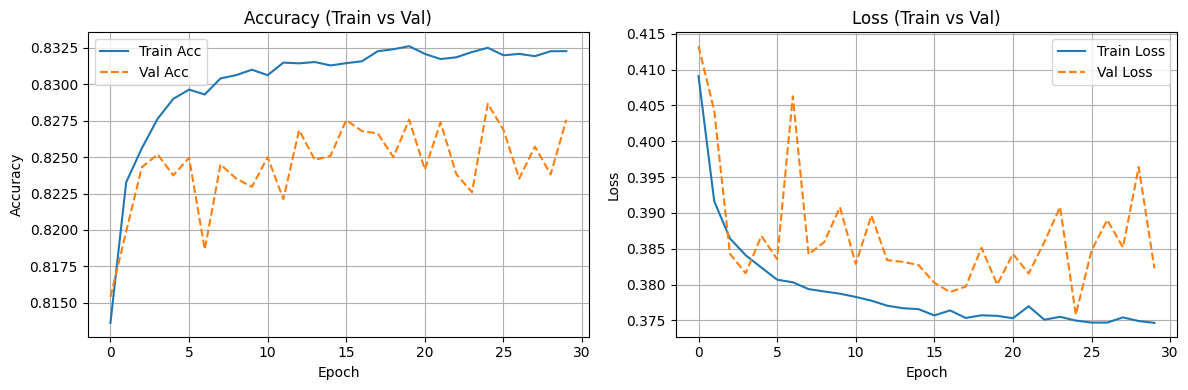

In [38]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_model_2.history['accuracy'], label='Train Acc')
axs[0].plot(history_model_2.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_model_2.history['loss'], label='Train Loss')
axs[1].plot(history_model_2.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model-3

In [ ]:
model_3 = Sequential([
    InputLayer(shape=(31,)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_3.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model_3.summary()

# Train model
history_model_3 = model_3.fit(
    X_train, y_train,
    validation_split=0.15,
    epochs=30,
    verbose=1
)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 191,617 (748.50 KB)

 Trainable params: 191,617 (748.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 52s 8ms/step - accuracy: 0.8024 - loss: 0.4242 - val_accuracy: 0.8235 - val_loss: 0.3830
Epoch 2/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 99s 11ms/step - accuracy: 0.8302 - loss: 0.3787 - val_accuracy: 0.8288 - val_loss: 0.3802
Epoch 3/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 77s 10ms/step - accuracy: 0.8338 - loss: 0.3707 - val_accuracy: 0.8285 - val_loss: 0.3787
Epoch 4/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 67s 8ms/step - accuracy: 0.8332 - loss: 0.3696 - val_accuracy: 0.8253 - val_loss: 0.3783
Epoch 5/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 47s 8ms/step - accuracy: 0.8362 - loss: 0.3656 - val_accuracy: 0.8309 - val_loss: 0.3749
Epoch 6/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 50s 9ms/step - accuracy: 0.8367 - loss: 0.3642 - val_accuracy: 0.8295 - val_loss: 0.3701
Epoch 7/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy: 0.8373 - loss: 0.3619 - val_accuracy: 0.8287 - val_loss: 0.3733
Epoch 8/30
5645/5645 ━━━━━━━━━━━━━━━━━━━━ 87s 9ms/step - accuracy: 0.8370 - loss:

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


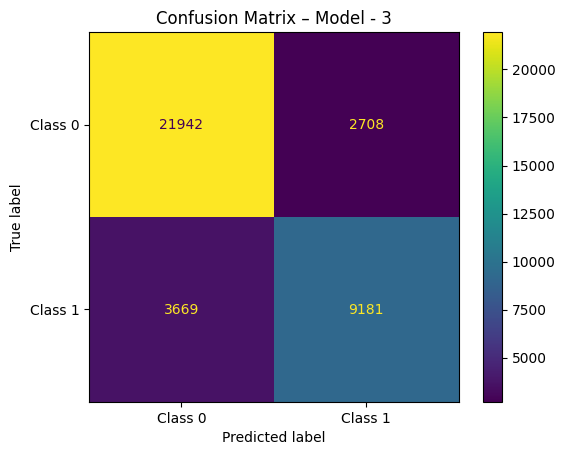

✅ Train Accuracy: 0.852
✅ Test Accuracy: 0.830

✅ Train Loss: 0.3321
✅ Test Loss: 0.4009
 Test Classification Report
              precision    recall  f1-score   support

           0       0.86      0.89      0.87     24650
           1       0.77      0.71      0.74     12850

    accuracy                           0.83     37500
   macro avg       0.81      0.80      0.81     37500
weighted avg       0.83      0.83      0.83     37500



In [40]:
# Predict
y_pred_model_3 = (model_3.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_model_3), display_labels=["Class 0", "Class 1"]).plot()
plt.title("Confusion Matrix – Model - 3")
plt.show()

# accuracy
train_loss, train_accuracy = model_3.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_3.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# classification report
from sklearn.metrics import classification_report

print(" Test Classification Report")
print(classification_report(y_test, y_pred_model_3, digits=2))

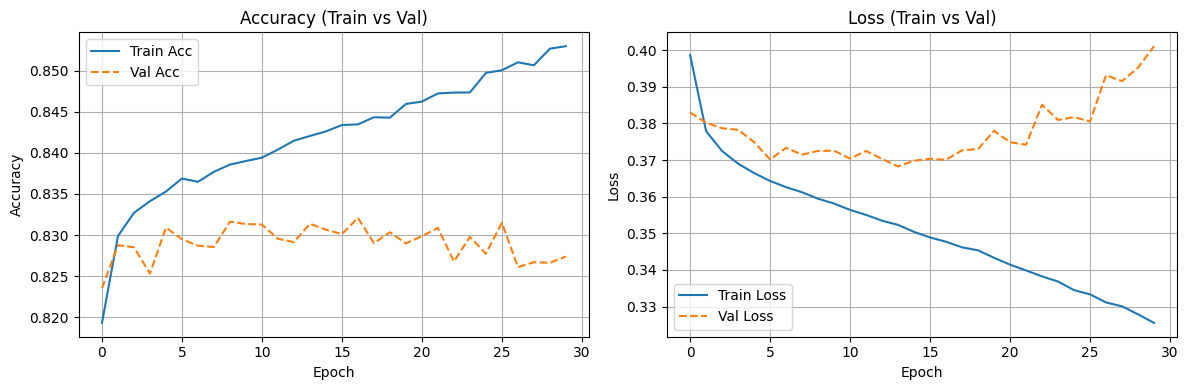

In [41]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_model_3.history['accuracy'], label='Train Acc')
axs[0].plot(history_model_3.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_model_3.history['loss'], label='Train Loss')
axs[1].plot(history_model_3.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model-4

In [21]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

#kernel_regularizer=regularizers.l2(0.001)
#layers.BatchNormalization(),

model_4 = Sequential([
        InputLayer(shape=(31,)),

        layers.Dense(32),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(16),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(8),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
])


model_4.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_signal_classify_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history_model_4 = model_4.fit(X_train, y_train,
                                      validation_split=0.15,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      epochs=150,
                                      batch_size=128,
                                      verbose=1)

Epoch 1/150
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7055 - loss: 0.5678
Epoch 1: val_loss improved from inf to 0.41823, saving model to best_signal_classify_model.keras
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7056 - loss: 0.5678 - val_accuracy: 0.8093 - val_loss: 0.4182 - learning_rate: 0.0010
Epoch 2/150
1409/1412 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7929 - loss: 0.4474
Epoch 2: val_loss improved from 0.41823 to 0.39902, saving model to best_signal_classify_model.keras
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7929 - loss: 0.4474 - val_accuracy: 0.8180 - val_loss: 0.3990 - learning_rate: 0.0010
Epoch 3/150
1411/1412 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8037 - loss: 0.4304
Epoch 3: val_loss improved from 0.39902 to 0.39112, saving model to best_signal_classify_model.keras
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8037 - loss: 0.4304 - val_accuracy: 0.8213 - val_loss: 0.3911 - learning_rate: 0.0010
Epoc

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


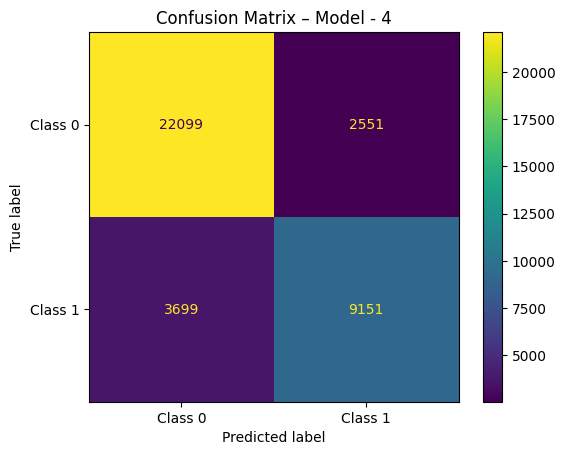

✅ Train Accuracy: 0.834
✅ Test Accuracy: 0.833

✅ Train Loss: 0.3703
✅ Test Loss: 0.3720
 Test Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     24650
           1       0.78      0.71      0.75     12850

    accuracy                           0.83     37500
   macro avg       0.82      0.80      0.81     37500
weighted avg       0.83      0.83      0.83     37500



In [22]:
# Predict
y_pred_model_4 = (model_4.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_model_4), display_labels=["Class 0", "Class 1"]).plot()
plt.title("Confusion Matrix – Model - 4")
plt.show()

# accuracy
train_loss, train_accuracy = model_4.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_4.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# classification report
from sklearn.metrics import classification_report

print(" Test Classification Report")
print(classification_report(y_test, y_pred_model_4, digits=2))

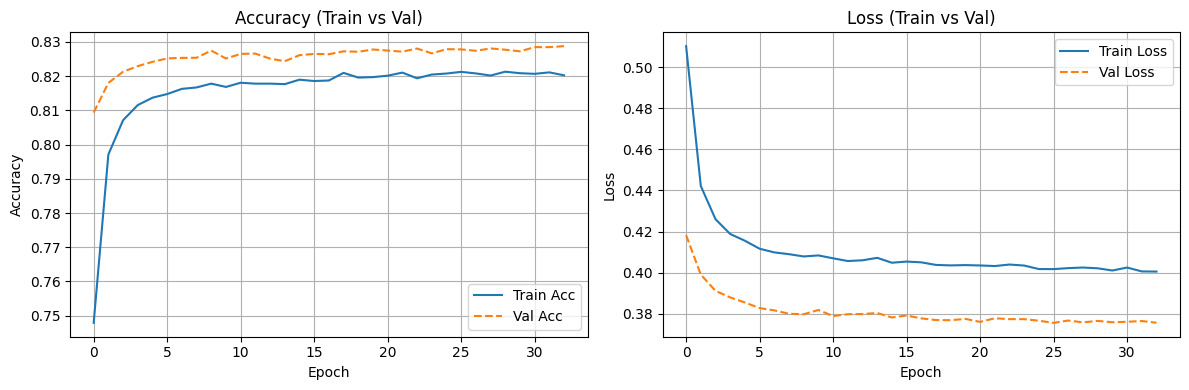

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_model_4.history['accuracy'], label='Train Acc')
axs[0].plot(history_model_4.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_model_4.history['loss'], label='Train Loss')
axs[1].plot(history_model_4.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model -5

In [24]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

#kernel_regularizer=regularizers.l2(0.001)
#layers.BatchNormalization(),

model_5 = Sequential([
        InputLayer(shape=(31,)),

        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(32),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(16),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(8),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(4),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(2),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(1, activation='sigmoid')
])


model_5.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_signal_classify_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history_model_5 = model_5.fit(X_train, y_train,
                                      validation_split=0.15,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      epochs=150,
                                      batch_size=128,
                                      verbose=1)

Epoch 1/150
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6034 - loss: 0.6901
Epoch 1: val_loss improved from inf to 0.55690, saving model to best_signal_classify_model.keras
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 34s 13ms/step - accuracy: 0.6034 - loss: 0.6901 - val_accuracy: 0.7759 - val_loss: 0.5569 - learning_rate: 0.0010
Epoch 2/150
1407/1412 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7362 - loss: 0.5662
Epoch 2: val_loss improved from 0.55690 to 0.48105, saving model to best_signal_classify_model.keras
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7363 - loss: 0.5661 - val_accuracy: 0.7894 - val_loss: 0.4811 - learning_rate: 0.0010
Epoch 3/150
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7567 - loss: 0.5321
Epoch 3: val_loss improved from 0.48105 to 0.44824, saving model to best_signal_classify_model.keras
1412/1412 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.7567 - loss: 0.5321 - val_accuracy: 0.8123 - val_loss: 0.4482 - learning_rate: 0.0010
E

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


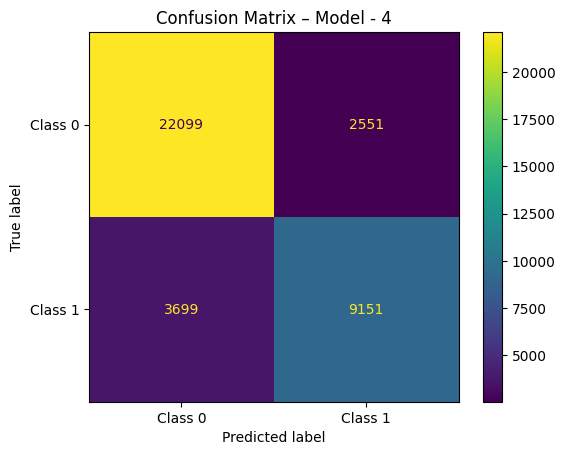

✅ Train Accuracy: 0.836
✅ Test Accuracy: 0.833

✅ Train Loss: 0.4033
✅ Test Loss: 0.4081
 Test Classification Report
              precision    recall  f1-score   support

           0       0.86      0.90      0.88     24650
           1       0.78      0.71      0.75     12850

    accuracy                           0.83     37500
   macro avg       0.82      0.80      0.81     37500
weighted avg       0.83      0.83      0.83     37500



In [25]:
# Predict
y_pred_model_5 = (model_5.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_model_5), display_labels=["Class 0", "Class 1"]).plot()
plt.title("Confusion Matrix – Model - 5")
plt.show()

# accuracy
train_loss, train_accuracy = model_5.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_5.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# classification report
from sklearn.metrics import classification_report

print(" Test Classification Report")
print(classification_report(y_test, y_pred_model_5, digits=2))

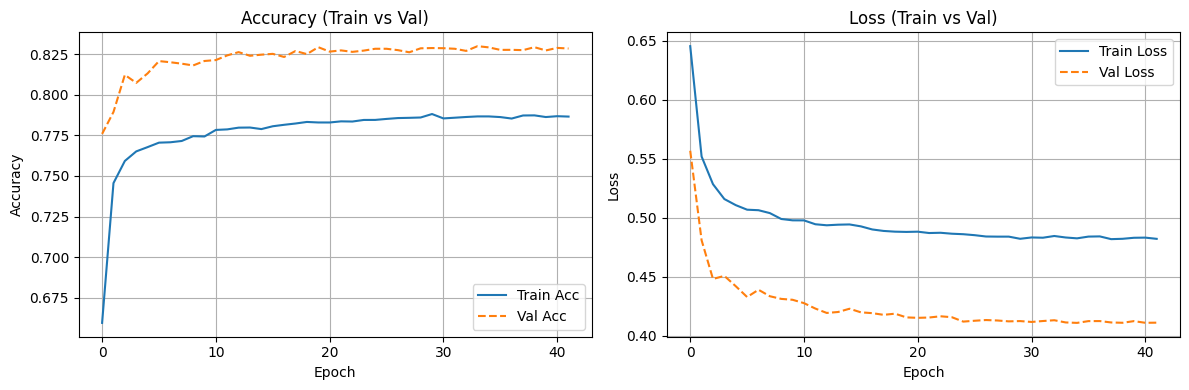

In [26]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_model_5.history['accuracy'], label='Train Acc')
axs[0].plot(history_model_5.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_model_5.history['loss'], label='Train Loss')
axs[1].plot(history_model_5.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Model-6

In [56]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

#kernel_regularizer=regularizers.l2(0.001)
#layers.BatchNormalization(),

model_6 = Sequential([
        InputLayer(shape=(31,)),

        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(64),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(32),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(16),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dropout(0.3),

        layers.Dense(1, activation='sigmoid')
])


model_6.compile(optimizer=Adam(learning_rate=0.001),
                       loss='binary_crossentropy',
                       metrics=['accuracy'])


reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1, min_lr=1e-5)
checkpoint = ModelCheckpoint('best_signal_classify_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stop = EarlyStopping(monitor='val_loss', patience=7, restore_best_weights=True, verbose=1)

history_model_6 = model_6.fit(X_train, y_train,
                                      validation_split=0.15,
                                      callbacks=[reduce_lr, checkpoint, early_stop],
                                      epochs=150,
                                      batch_size=64,
                                      verbose=1)

Epoch 1/150
2823/2823 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7190 - loss: 0.5379
Epoch 1: val_loss improved from inf to 0.39949, saving model to best_signal_classify_model.keras
2823/2823 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.7190 - loss: 0.5379 - val_accuracy: 0.8148 - val_loss: 0.3995 - learning_rate: 0.0010
Epoch 2/150
2821/2823 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8036 - loss: 0.4305
Epoch 2: val_loss improved from 0.39949 to 0.38684, saving model to best_signal_classify_model.keras
2823/2823 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.8036 - loss: 0.4305 - val_accuracy: 0.8223 - val_loss: 0.3868 - learning_rate: 0.0010
Epoch 3/150
2821/2823 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8115 - loss: 0.4174
Epoch 3: val_loss improved from 0.38684 to 0.38229, saving model to best_signal_classify_model.keras
2823/2823 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8115 - loss: 0.4174 - val_accuracy: 0.8237 - val_loss: 0.3823 - learning_rate: 0.0010
Ep

1172/1172 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


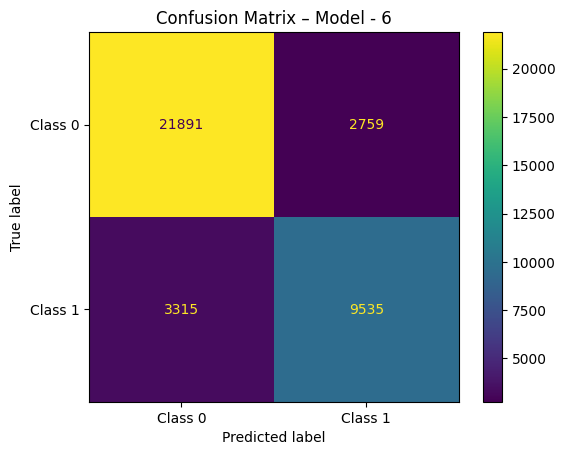

✅ Train Accuracy: 0.838
✅ Test Accuracy: 0.838

✅ Train Loss: 0.3609
✅ Test Loss: 0.3650
 Test Classification Report
              precision    recall  f1-score   support

           0       0.87      0.89      0.88     24650
           1       0.78      0.74      0.76     12850

    accuracy                           0.84     37500
   macro avg       0.82      0.82      0.82     37500
weighted avg       0.84      0.84      0.84     37500



In [57]:
# Predict
y_pred_model_6 = (model_6.predict(X_test) > 0.5).astype("int32")

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_model_6), display_labels=["Class 0", "Class 1"]).plot()
plt.title("Confusion Matrix – Model - 6")
plt.show()

# accuracy
train_loss, train_accuracy = model_6.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model_6.evaluate(X_test, y_test, verbose=0)
print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

# classification report
from sklearn.metrics import classification_report

print(" Test Classification Report")
print(classification_report(y_test, y_pred_model_6, digits=2))

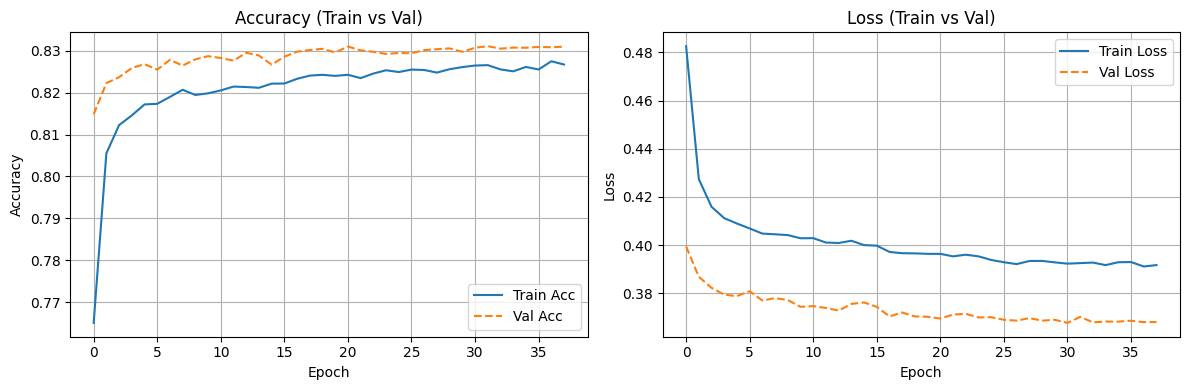

In [58]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# Accuracy plot
axs[0].plot(history_model_6.history['accuracy'], label='Train Acc')
axs[0].plot(history_model_6.history['val_accuracy'], label='Val Acc', linestyle='--')
axs[0].set_title('Accuracy (Train vs Val)')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].legend()
axs[0].grid(True)

# Loss plot
axs[1].plot(history_model_6.history['loss'], label='Train Loss')
axs[1].plot(history_model_6.history['val_loss'], label='Val Loss', linestyle='--')
axs[1].set_title('Loss (Train vs Val)')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

### Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

rf_model= RandomForestClassifier()

rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [53]:
from sklearn.metrics import classification_report, accuracy_score


# Predict on train and test
train_preds = rf_model.predict(X_train)
test_preds = rf_model.predict(X_test)

# Accuracy
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print("\n✅ Test Classification Report")
print(classification_report(y_test, test_preds, digits=4))

print(" Train Accuracy: ",train_accuracy)
print(" Test Accuracy: ",test_accuracy)


✅ Test Classification Report
              precision    recall  f1-score   support

           0     0.8561    0.9084    0.8815     24650
           1     0.8010    0.7072    0.7512     12850

    accuracy                         0.8395     37500
   macro avg     0.8286    0.8078    0.8163     37500
weighted avg     0.8373    0.8395    0.8368     37500

 Train Accuracy:  0.9999717647058823
 Test Accuracy:  0.8394666666666667


### XGBoost

In [14]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
model = XGBClassifier(
    n_estimators=500,         # Number of trees
    learning_rate=0.03,        # Step size
    max_depth=5,              # Max depth of trees
    use_label_encoder=False,  # Required to suppress warning
    eval_metric=['logloss', 'error']     # Evaluation metric for binary classification
)

model.fit(X_train, y_train)

eval_set = [(X_train, y_train), (X_test, y_test)]

model.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    verbose=False  # change to True if you want to see output while training
)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [10:55:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['logloss', 'error'],
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.03, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [50]:
results = model.evals_result()

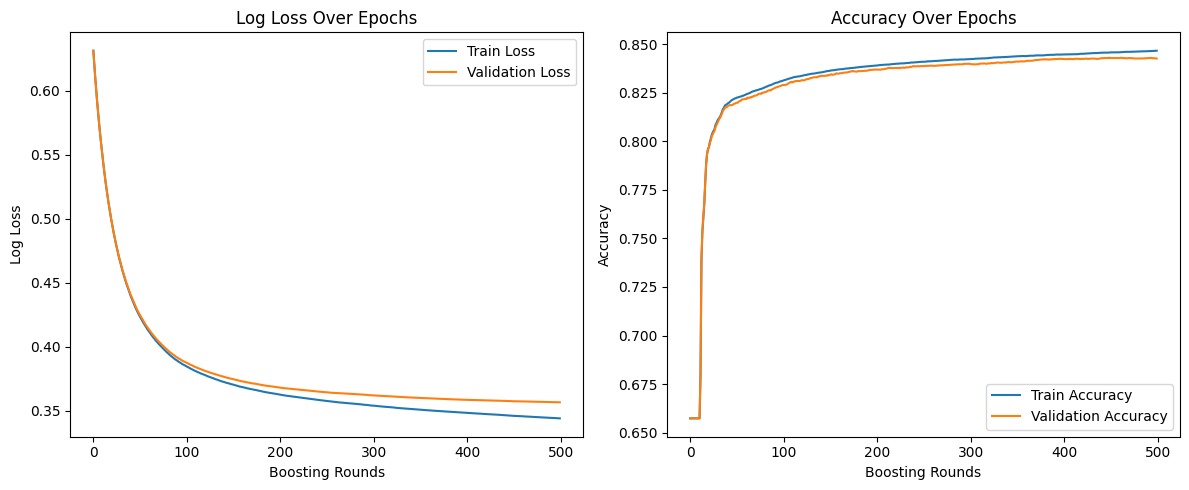

In [51]:
# Plot Loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(results['validation_0']['logloss'], label='Train Loss')
plt.plot(results['validation_1']['logloss'], label='Validation Loss')
plt.title('Log Loss Over Epochs')
plt.xlabel('Boosting Rounds')
plt.ylabel('Log Loss')
plt.legend()

# Plot Accuracy (1 - error)
plt.subplot(1, 2, 2)
train_acc = [1 - e for e in results['validation_0']['error']]
val_acc = [1 - e for e in results['validation_1']['error']]
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Boosting Rounds')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [52]:
y_pred = model.predict(X_test)  # Predict 0 or 1
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8426933333333333
Confusion Matrix:
 [[22239  2411]
 [ 3488  9362]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88     24650
           1       0.80      0.73      0.76     12850

    accuracy                           0.84     37500
   macro avg       0.83      0.82      0.82     37500
weighted avg       0.84      0.84      0.84     37500



In [53]:
from sklearn.metrics import accuracy_score, log_loss

# Calculate accuracy and loss for the training set
train_accuracy = accuracy_score(y_train, model.predict(X_train))
train_loss = log_loss(y_train, model.predict_proba(X_train)[:, 1]) # Use predict_proba for log_loss

# Calculate accuracy and loss for the test set
test_accuracy = accuracy_score(y_test, model.predict(X_test))
test_loss = log_loss(y_test, model.predict_proba(X_test)[:, 1]) # Use predict_proba for log_loss

print(f"✅ Train Accuracy: {train_accuracy:.3f}")
print(f"✅ Test Accuracy: {test_accuracy:.3f}")

print(f"\n✅ Train Loss: {train_loss:.4f}")
print(f"✅ Test Loss: {test_loss:.4f}")

✅ Train Accuracy: 0.847
✅ Test Accuracy: 0.843

✅ Train Loss: 0.3440
✅ Test Loss: 0.3565


## Summary

It is evident from the below table that **Deep learning Model-6** performed well in terms of f1-score, accuracy and reducing loss. It was also seen that **XGBoost** performs well with slightly better results than **Deep Larning Model-6.**

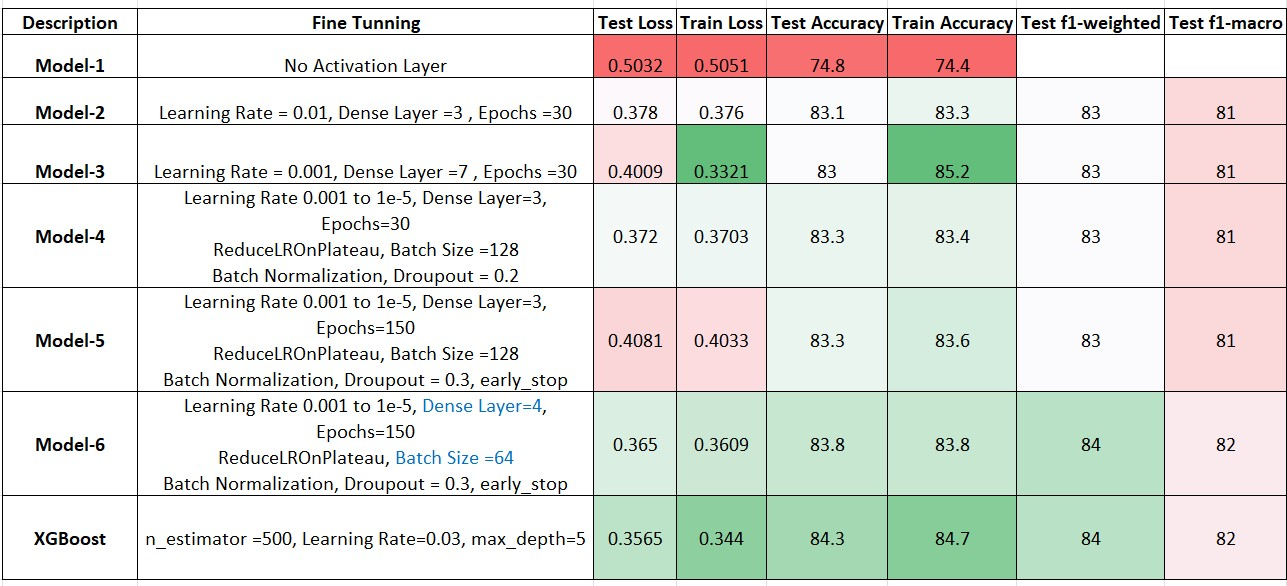

**• How did model depth affect performance?**

By increasing model depth from Model-2 (3 Dense layers) to Model-3 (7 Dense layers) accuracy and train loss improved

**• What helped mitigate overfitting?**

Overfitting can be observed in Model-3, it was reduced by introducing BatchNormalization and dropoutlayer in Model-4


**• How did the learning rate affect convergence?**

It was observed that when Learning rate was high such as 0.01 (Model-2) it was not converging but when learning rate was set 0.001 (Model-4) and smaller it was performing better

**• What would you improve with more time or compute?**

If I had more time or compute I will have done other ensemble techniques such as Random Forest and also Logistic regression to see how these model perform

## All Model Learning Curves are listed again for better Comparision and looking at summary table

## Model-2

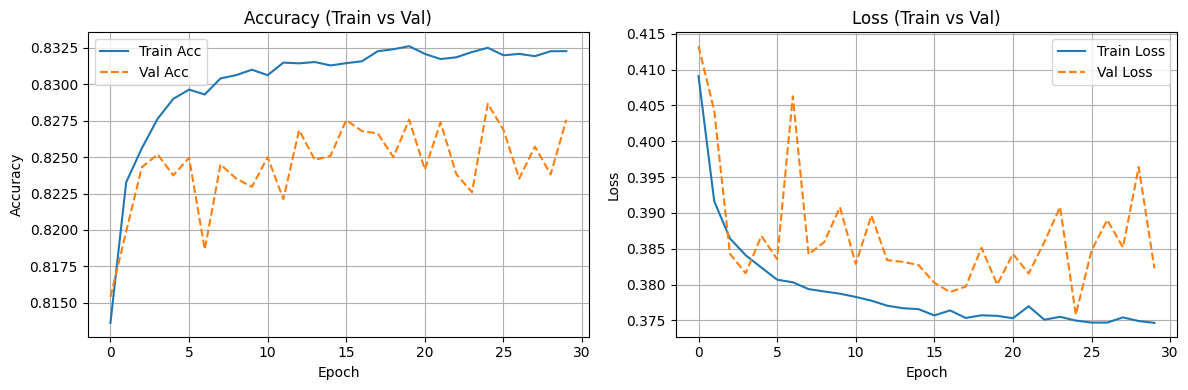

### Model-3

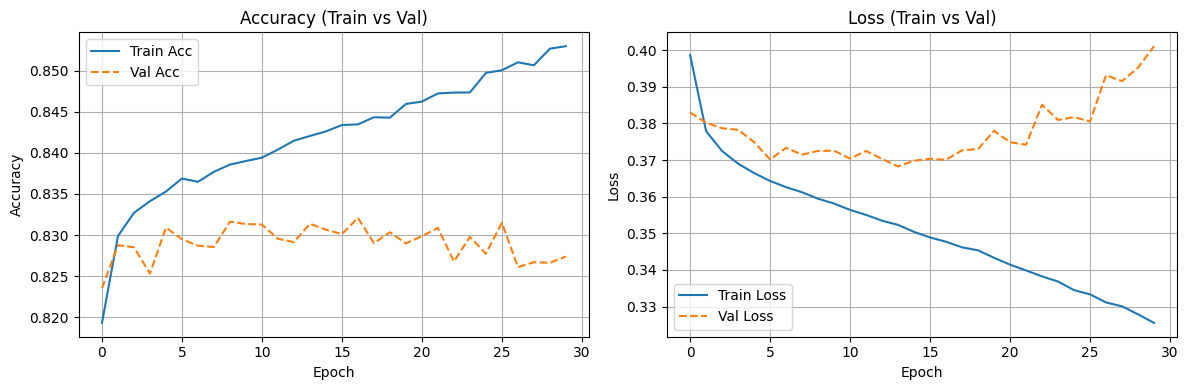

### Model-4

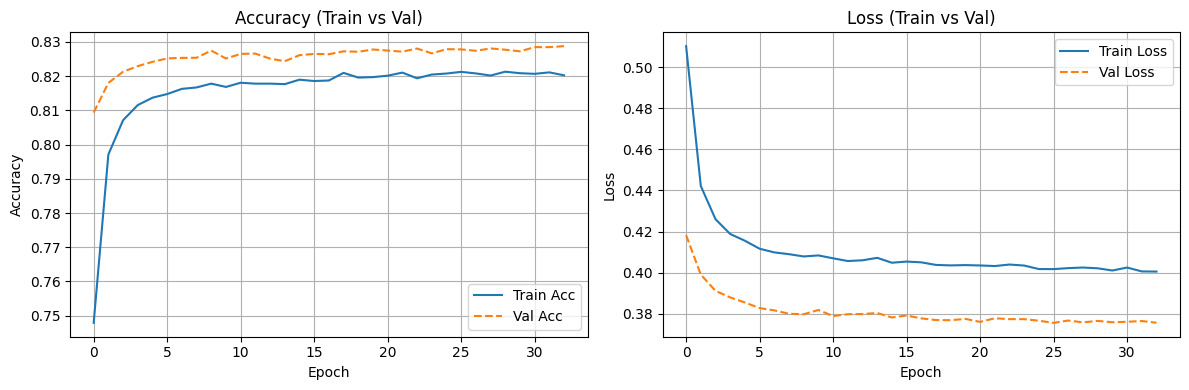

### Model-5

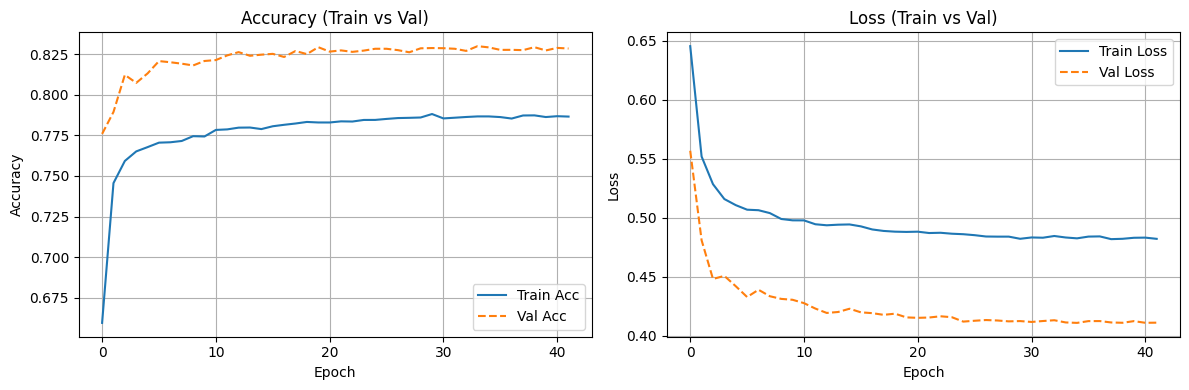

### Model-6

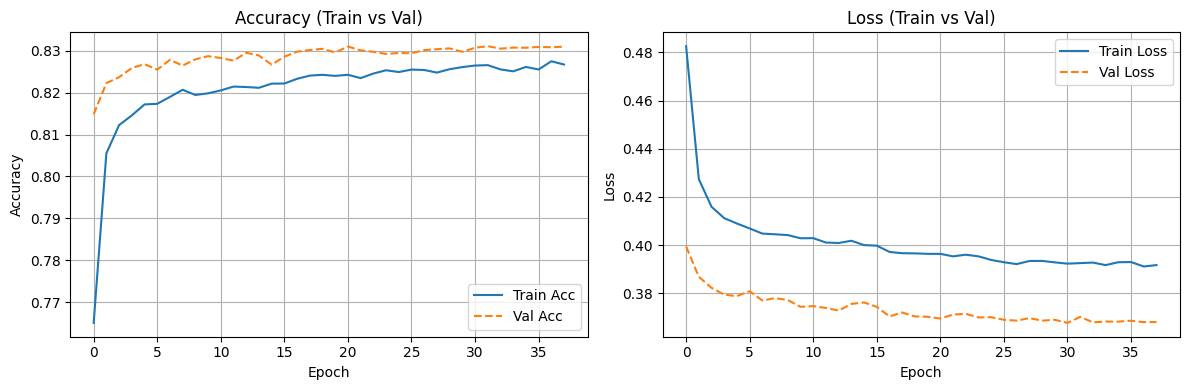

### XGBoost

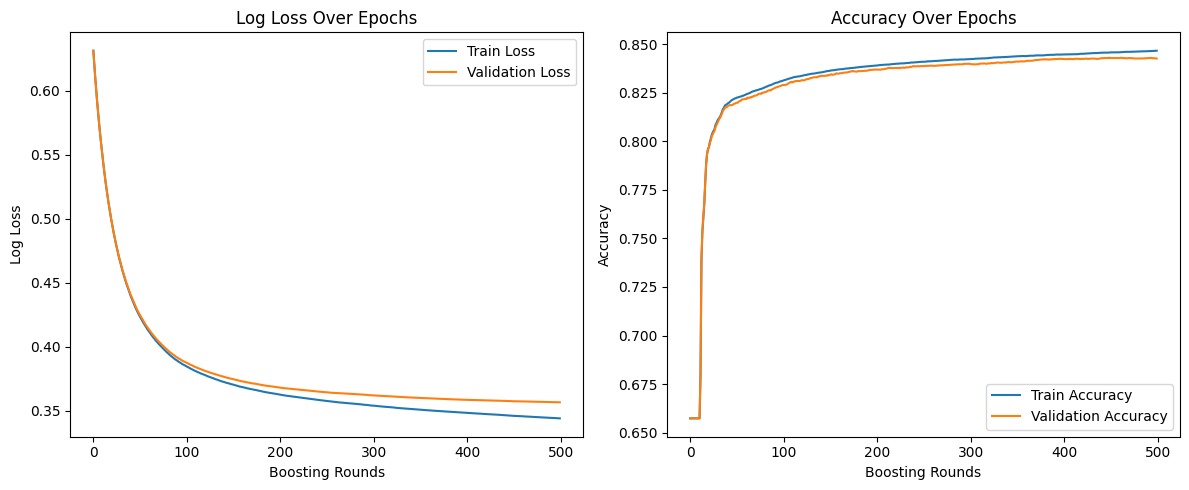